In [1]:
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import StandardScaler
from adjustText import adjust_text  
import warnings
import matplotlib.cm as cm
import anndata as ad

# PCA

In [2]:
adata=ad.read_h5ad('./Data/adata_with_metadata')

In [3]:
adata.X=pd.DataFrame(adata.layers["knn_imputed_from_log2_total_norm"], index=adata.obs_names, columns=adata.var_names)

/tmp/ipykernel_83117/1077978114.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis_cmap = cm.get_cmap('viridis')


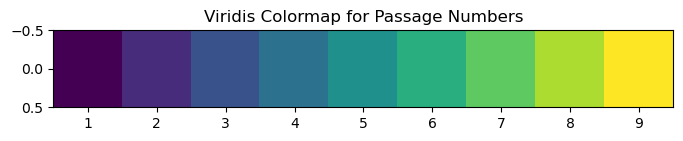

{'1': (0.267004, 0.004874, 0.329415, 1.0),
 '2': (0.278826, 0.17549, 0.483397, 1.0),
 '3': (0.229739, 0.322361, 0.545706, 1.0),
 '4': (0.172719, 0.448791, 0.557885, 1.0),
 '5': (0.127568, 0.566949, 0.550556, 1.0),
 '6': (0.157851, 0.683765, 0.501686, 1.0),
 '7': (0.369214, 0.788888, 0.382914, 1.0),
 '8': (0.678489, 0.863742, 0.189503, 1.0),
 '9': (0.993248, 0.906157, 0.143936, 1.0)}

In [4]:
# Define passage numbers (1 to 9)
passages = np.arange(1, 10)

# Normalize passage values between 0 and 1 for colormap
norm = plt.Normalize(vmin=1, vmax=9)

# Generate colors from Viridis colormap
viridis_cmap = cm.get_cmap('viridis')
colors = [viridis_cmap(norm(p)) for p in passages]

# Create a mapping dictionary
passage_color_map = {str(p): colors[i] for i, p in enumerate(passages)}

# Display the colormap
plt.figure(figsize=(8, 1))
plt.imshow([colors], aspect="auto", cmap=viridis_cmap)
plt.xticks(ticks=np.linspace(0, 8, 9), labels=passages)
plt.title("Viridis Colormap for Passage Numbers")
plt.show()

# Output mapping dictionary
passage_color_map


In [5]:
# Scale the data in adata.X (single scale)
scaler = StandardScaler()
adata.layers['knn_imputed_from_log2_total_norm_ss']= scaler.fit_transform(pd.DataFrame(adata.layers["knn_imputed_from_log2_total_norm"], index=adata.obs_names, columns=adata.var_names))

# Scale the data in adata.X (double scale) 
scaler = StandardScaler()
adata.layers['knn_imputed_from_log2_total_norm_ds']= scaler.fit_transform(pd.DataFrame(adata.layers["knn_imputed_from_log2_total_norm_ss"], index=adata.obs_names, columns=adata.var_names))


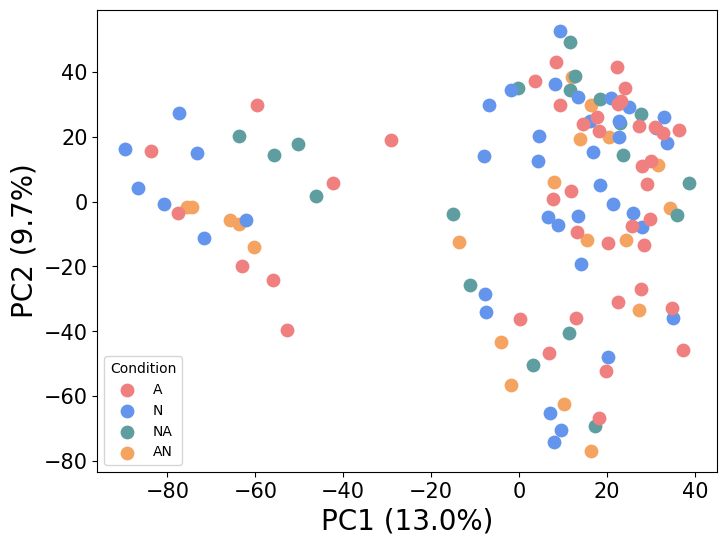

In [6]:
# Perform PCA
pca = PCA(n_components=2)  # We'll do a 2D PCA for visualization
adata.obsm['X_pca'] = pca.fit_transform(pd.DataFrame(adata.layers["knn_imputed_from_log2_total_norm_ds"], index=adata.obs_names, columns=adata.var_names).fillna(0))
palette = {"A": "lightcoral", "N": "cornflowerblue", "AN": "sandybrown", "NA": "cadetblue"}
# Extract variance explained for PC1 and PC2
var_exp = pca.explained_variance_ratio_ * 100  # Convert to percentage
pc1_var, pc2_var = var_exp[0], var_exp[1]  # Variance explained by PC1 & PC2
# Plot the PCA results
plt.figure(figsize=(8, 6))
for label in adata.obs['condition'].unique():
    # Filter by label
    subset = adata[adata.obs['condition'] == label]
    plt.scatter(subset.obsm['X_pca'][:, 0], subset.obsm['X_pca'][:, 1], label=label,color=palette[label],s=80)

# Add labels and title
plt.xlabel(f'PC1 ({pc1_var:.1f}%)', fontsize=20)
plt.ylabel(f'PC2 ({pc2_var:.1f}%)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.title('PCA of Data, colored by A_N_order, scaled')
plt.legend(title='Condition',reverse=True)

# Show plot
plt.show()

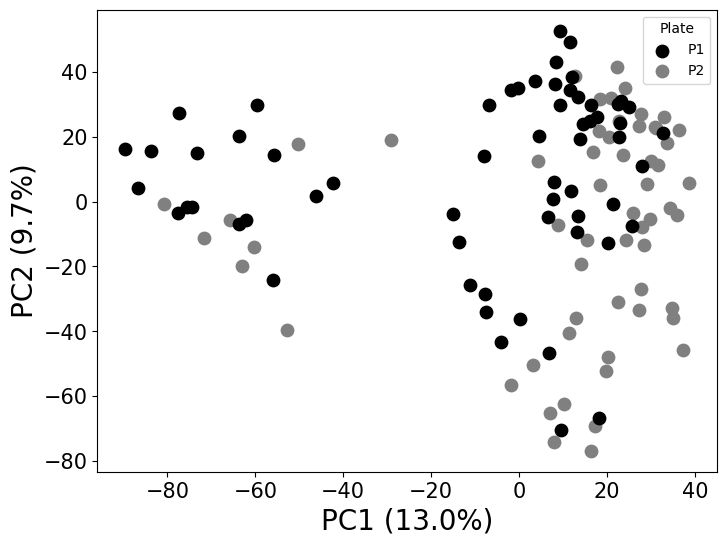

In [7]:
# Perform PCA
plate_colors={'P1':'k', 'P2':'gray'}
pca = PCA(n_components=2)  # We'll do a 2D PCA for visualization
adata.obsm['X_pca'] = pca.fit_transform(pd.DataFrame(adata.layers["knn_imputed_from_log2_total_norm_ds"], index=adata.obs_names, columns=adata.var_names).fillna(0))
#palette = {"A": "lightcoral", "N": "cornflowerblue", "AN": "sandybrown", "NA": "cadetblue"}
# Extract variance explained for PC1 and PC2
var_exp = pca.explained_variance_ratio_ * 100  # Convert to percentage
pc1_var, pc2_var = var_exp[0], var_exp[1]  # Variance explained by PC1 & PC2
# Plot the PCA results
plt.figure(figsize=(8, 6))
for label in adata.obs['plate'].unique():
    # Filter by label
    subset = adata[adata.obs['plate'] == label]
    plt.scatter(subset.obsm['X_pca'][:, 0], subset.obsm['X_pca'][:, 1], label=label,c=plate_colors[label],s=80)

# Add labels and title
plt.xlabel(f'PC1 ({pc1_var:.1f}%)', fontsize=20)
plt.ylabel(f'PC2 ({pc2_var:.1f}%)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.title('PCA of Data, colored by A_N_order, scaled')
plt.legend(title='Plate',reverse=True)

# Show plot
plt.show()

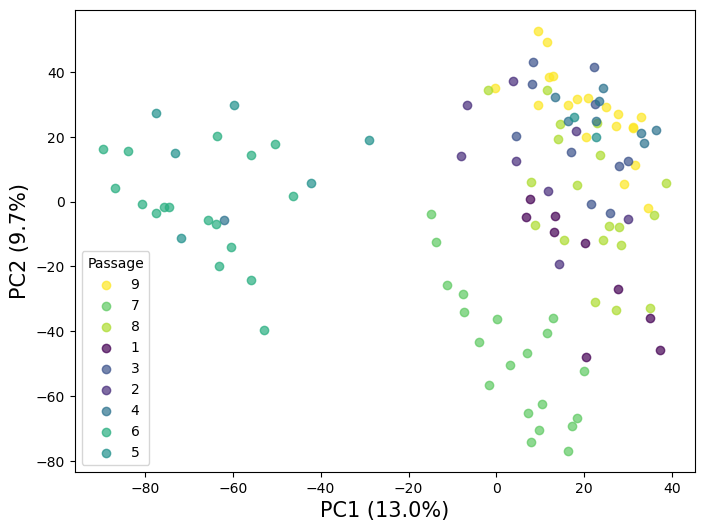

In [8]:

# Perform PCA on imputed data
X_imputed = pd.DataFrame(
    adata.layers["knn_imputed_from_log2_total_norm_ds"], 
    index=adata.obs_names, 
    columns=adata.var_names
).fillna(0)  # Fill missing values

pca = PCA(n_components=2)
adata.obsm['X_pca'] = pca.fit_transform(X_imputed)

# Extract variance explained for PC1 and PC2
var_exp = pca.explained_variance_ratio_ * 100  # Convert to percentage
pc1_var, pc2_var = var_exp[0], var_exp[1]  # Variance explained by PC1 & PC2

# Plot PCA results
plt.figure(figsize=(8, 6))

for label in adata.obs['passage'].unique():
    label_str = str(int(label))  # Ensure string conversion
    subset = adata[adata.obs['passage'] == label].copy()  # Avoid view issues
    
    plt.scatter(
        subset.obsm['X_pca'][:, 0], 
        subset.obsm['X_pca'][:, 1], 
        label=label_str, 
        color=passage_color_map[label_str], 
        alpha=0.7  # Improve visibility
    )

# Add labels with variance explained
plt.xlabel(f'PC1 ({pc1_var:.1f}%)', fontsize=15)
plt.ylabel(f'PC2 ({pc2_var:.1f}%)', fontsize=15)

# Adjust legend automatically
plt.legend(title='Passage', 
           #bbox_to_anchor=(1.05, 1), loc='upper left',
           #labels=[1,2,3,4,5,6,7,8,9]
          )

# Show plot
plt.show()



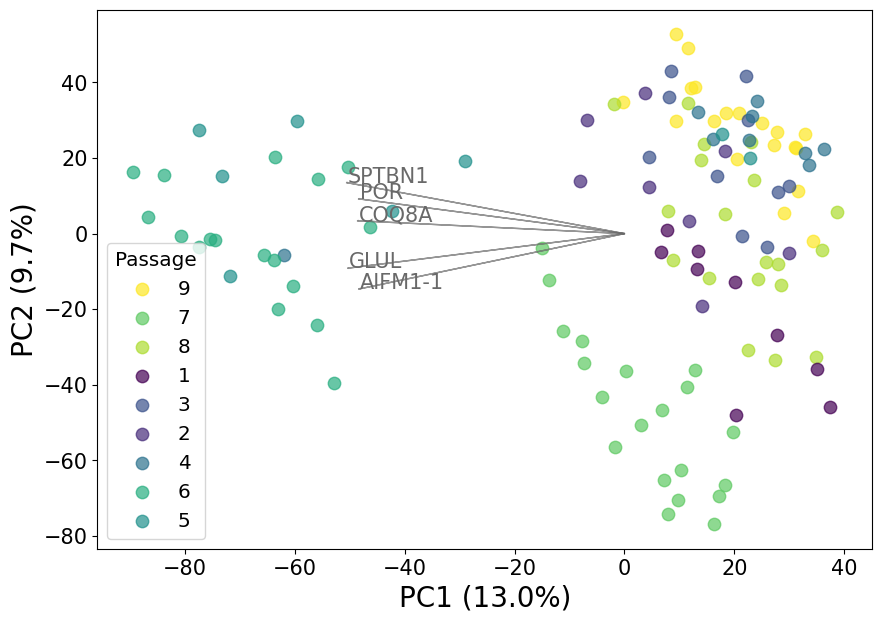

In [9]:
# Perform PCA on imputed & log-transformed data
X = pd.DataFrame(adata.layers["knn_imputed_from_log2_total_norm_ds"], index=adata.obs_names, columns=adata.var_names).fillna(0)
pca = PCA(n_components=2)
adata.obsm['X_pca'] = pca.fit_transform(X)
# Extract variance explained for PC1 and PC2
var_exp = pca.explained_variance_ratio_ * 100  # Convert to percentage
pc1_var, pc2_var = var_exp[0], var_exp[1]  # Variance explained by PC1 & PC2

# Extract PCA results
pc1_scores, pc2_scores = adata.obsm['X_pca'][:, 0], adata.obsm['X_pca'][:, 1]
loadings = pca.components_.T  # Loadings matrix (genes × PCs)

# Define proteins of interest (must exist in adata.var_names)
proteins_of_interest = ['COQ8A', 'GLUL', 'AIFM1-1', 'POR', 'SPTBN1' ]

# Get indices of proteins in the dataset
protein_indices = [i for i, prot in enumerate(adata.var_names) if prot in proteins_of_interest]

# Scale loadings for visibility
scaling_factor = 2000  # Adjust if needed
pc1_loadings_scaled = loadings[protein_indices, 0] * scaling_factor
pc2_loadings_scaled = loadings[protein_indices, 1] * scaling_factor

# Plot PCA scatter plot, colored by 'passage'
plt.figure(figsize=(10, 7))
for label in adata.obs['passage'].unique():
    label_str = str(int(label))  # Ensure string conversion
    subset = adata[adata.obs['passage'] == label].copy()  # Avoid view issues
    
    plt.scatter(
        subset.obsm['X_pca'][:, 0], 
        subset.obsm['X_pca'][:, 1], 
        label=label_str, 
        color=passage_color_map[label_str], 
        alpha=0.7,
        s=80# Improve visibility
    )


# Add loading vectors (arrows)
for i, prot in enumerate(proteins_of_interest):
    if prot in adata.var_names:
        plt.arrow(0, 0, pc1_loadings_scaled[i], pc2_loadings_scaled[i], color='dimgray', alpha=0.7, head_width=0.2)
        plt.text(pc1_loadings_scaled[i], pc2_loadings_scaled[i], prot, fontsize=15, color='dimgray')

# Labels, title, and legend
plt.xlabel(f'PC1 ({pc1_var:.1f}%)', fontsize=20)
plt.ylabel(f'PC2 ({pc2_var:.1f}%)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.title('PCA of Data with Loading Vectors')
plt.legend(title='Passage', title_fontsize='x-large',
           #bbox_to_anchor=(1.05, 1), loc='upper left',
           fontsize='x-large')
# Show plot
plt.show()


In [10]:
# PCA loadings (how much each protein contributes to each PC)
pca_loadings = pd.DataFrame(
    pca.components_.T,  # Transpose so rows are proteins, columns are PCs
    index=adata.var_names,  # Protein names from adata
    columns=[f'PC{i+1}' for i in range(pca.n_components_)]
)
# Get absolute contributions to PC1 and sort
#top_proteins_pc1 = pca_loadings['PC1'].abs().sort_values(ascending=False).head(20)
#print("Top proteins contributing to PC1:")
#print(top_proteins_pc1.index.to_list())

In [11]:
top_proteins_pc1 = pca_loadings['PC1'].sort_values(ascending=False).head(20)
print("Top proteins contributing to PC1:")
print(top_proteins_pc1.index.to_list())

Top proteins contributing to PC1:
['KIF11', 'FANCD2', 'KIF2C', 'DNAJC15', 'DNA2', 'CDK4', 'MASTL', 'CEP55', 'TACC3', 'SPAG5', 'FAM83D', 'PRR11', 'CENPH', 'NUF2-1', 'UBE2T', 'IQGAP3', 'RB1CC1', 'TYMS', 'RTF2', 'SAPCD2']


In [12]:
loadings_for_gsea=pd.DataFrame(pca_loadings['PC1'].abs().sort_values(ascending=False))
loadings_for_gsea_raw=pd.DataFrame(pca_loadings['PC1'].sort_values(ascending=False))

In [13]:
loadings_for_gsea.reset_index(inplace=True)
loadings_for_gsea_raw.reset_index(inplace=True)

In [14]:
loadings_for_gsea.columns = ["Gene", "Score"]
loadings_for_gsea_raw.columns = ["Gene", "Score"]


In [15]:
loadings_for_gsea_raw

,Gene,Score
0,KIF11,0.026652
1,FANCD2,0.026609
2,KIF2C,0.026530
3,DNAJC15,0.026448
4,DNA2,0.026407
...,...,...
9513,POR,-0.024078
9514,SPTBN1,-0.024102
9515,AIFM1-1,-0.024193
9516,GLUL,-0.025069


In [16]:
loadings_for_gsea_raw.to_csv('./Data/loadings_for_gsea_raw_03052025.csv', index=False)

In [17]:
adata.obs['passage'] = pd.Categorical(adata.obs['passage'])

In [18]:
adata.obs["group"] = adata.obs["condition"].astype(str) + adata.obs["passage"].astype(str)

In [19]:
adata

AnnData object with n_obs × n_vars = 119 × 9518
    obs: 'pct_missing_samples', 'plate', 'replicate', 'passage', 'condition', 'group'
    var: 'pct_missing_proteins'
    uns: 'log1p'
    obsm: 'X_pca'
    layers: 'knn_imputed_from_log2_total_norm', 'knn_imputed_from_log2_total_norm_10e6', 'log2', 'log2_then_total_norm', 'norm_by_ACTG1', 'raw', 'total_norm', 'knn_imputed_from_log2_total_norm_ss', 'knn_imputed_from_log2_total_norm_ds'

In [20]:
#write
adata.write_h5ad('./Data/adata_for_stats')